In [51]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageFilter


with open('data/dataset.pkl', "rb") as file:
    dataset = pickle.load(file)
    

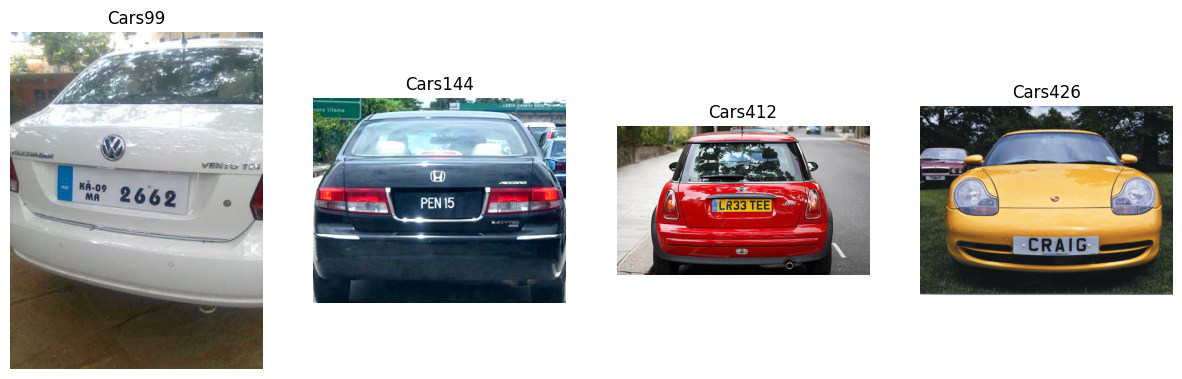

In [52]:
import random

random_keys = random.sample(list(dataset.keys()), 4)
_, axs = plt.subplots(1, 4, figsize=(15, 5))

for i, key in enumerate(random_keys):
    image = dataset[key]["image"] 
    axs[i].imshow(image)
    axs[i].axis('off') 
    axs[i].set_title(key)

plt.show()

In [53]:
filtered_data = {}
plate_count = 0
for key in dataset.keys():
    image = dataset[key]['image'].convert('L')
    for plate in dataset[key]['annotation']['objects']:
        xmin, ymin, xmax, ymax = plate['bndbox']
        filtered_data['Plate' + str(plate_count)] = { 
            'image': image.crop((xmin, ymin, xmax, ymax)),
            'difficult': plate['difficult'] }

    plate_count += 1
    

In [54]:
for key in filtered_data.keys():
    filtered_data[key]['image'] = filtered_data[key]['image'].resize((160,80))    

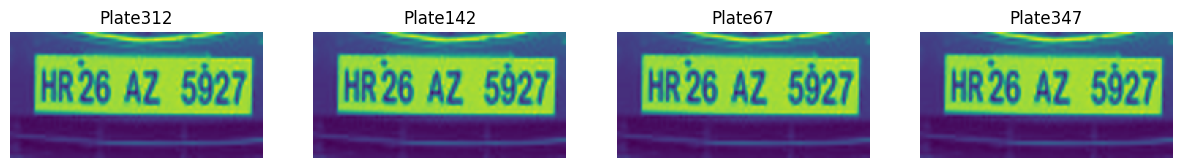

In [55]:
random_keys = random.sample(list(filtered_data.keys()), 4)
_, axs = plt.subplots(1, 4, figsize=(15, 5))

for i, key in enumerate(random_keys):
    image = filtered_data[key]["image"]
    axs[i].imshow(filtered_data[key]['image'])
    axs[i].axis('off') 
    axs[i].set_title(key)

plt.show()